# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Maulana Mubarak Ahmad
- Email: maulanamubarakahmad@gmail.com
- Id Dicoding: alan44

## Menentukan Pertanyaan Bisnis

- Bagaimana kondisi cuaca berdampak pada jumlah pelanggan dan bagaimana mengembangkan dan mempertahankan penggunaan selama periode tersebut ?  
- Bandingkan pola kedua jenis user dan adakah strategi yang bisa direkomendasikan untuk meningkatkan user tersebut ?

## Menyiapkan semua library yang dibuthkan

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [104]:
df = pd.read_csv('data/hour.csv')
#dfday = pd.read_csv('data/day.csv')

### Assessing Data

##### 1. Tampilkan beberapa data awal

In [105]:
pd.set_option('display.max_columns', None)
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### 2. Tampilkan informasi kolom dan tipe data

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### 3. Tampilkan informasi deskriptif statistik dari dataset

In [107]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


##### 4. Cek Adanya Missing Data dan Data Duplikat

In [108]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [109]:
df.duplicated().sum()

0

##### 5. Cek Adanya Outlier  
Cek outlier pada kolom :  
(hum, windspeed)

In [110]:
# Drop Outliers 'hum'
Q1 = (df['hum']).quantile(0.25)
Q3 = (df['hum']).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)
 
outlierhum = (df['hum'] < minimum) | (df['hum'] > maximum)
# Tampilkan jumlah data outlier
print('Jumlah data outlier pada kolom',df['hum'].name,':',outlierhum.sum())

Jumlah data outlier pada kolom hum : 22


In [111]:
# Drop Outliers 'windspeed'
Q1 = (df['windspeed']).quantile(0.25)
Q3 = (df['windspeed']).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

outlierwind = (df['windspeed'] < minimum) | (df['windspeed'] > maximum)
# Tampilkan jumlah data outlier
print('Jumlah data outlier pada kolom',df['windspeed'].name,':',outlierwind.sum())

Jumlah data outlier pada kolom windspeed : 342


### Cleaning Data

##### Drop data outlier pada kolom hum dan windspeed

In [112]:
# Drop data outlier kolom hum dan windspeed lalu simpan pada variabel baru
# Cek baris dan kolom dataframe baru
df1 = df[~(outlierhum | outlierwind)]
df1.shape

(17016, 17)

In [113]:
# Drop data kolom instant karena tidak akan kita gunakan
df1 =  df1.drop('instant', axis=1)
df1.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...
Pada tahap ini kita akan melakukan eksplorasi analisis yang hasilnya masih dalam bentuk data pivot tabular

In [114]:
# Cek kembali semua kolom pada dataframe baru
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17016 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17016 non-null  object 
 1   season      17016 non-null  int64  
 2   yr          17016 non-null  int64  
 3   mnth        17016 non-null  int64  
 4   hr          17016 non-null  int64  
 5   holiday     17016 non-null  int64  
 6   weekday     17016 non-null  int64  
 7   workingday  17016 non-null  int64  
 8   weathersit  17016 non-null  int64  
 9   temp        17016 non-null  float64
 10  atemp       17016 non-null  float64
 11  hum         17016 non-null  float64
 12  windspeed   17016 non-null  float64
 13  casual      17016 non-null  int64  
 14  registered  17016 non-null  int64  
 15  cnt         17016 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.2+ MB


##### Pada tahap ini kita bisa review kembali pertanyaan bisnis  
1. Bagaimana kondisi cuaca berdampak pada jumlah pengguna dan bagaimana mempertahankan penggunaan selama periode tersebut ?
2. Bandingkan kedua jenis user dan adakah strategi yang bisa direkomendasikan untuk meningkatkan jumlah user terkecil ?
3. Apa saja faktor yang berdampak pada kenaikan user pada hari kerja (weekday) dengan akhir pekan (weekend) ?  

#### 1. Untuk menjawab pertanyaan nomor 1, mari kita kelompokkan hanya kolom yang terkait saja.  
- Yang akan kita gunakan adalah data kolom : (season, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt)

In [115]:
dfcuaca = df[['season','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']]
dfcuaca.head()

,season,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,0.24,0.2879,0.75,0.0,0,1,1


##### Disini kita akan fokus pada 3 kategori yaitu :  
pengguna casual, registered, dan total pengguna keduanya  
(casual, registered, cnt)

In [116]:
dfcuaca.corr(method='pearson')

,season,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
weathersit,-0.014524,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.312025,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.319380,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.150625,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.149773,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.120206,-0.152628,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.174226,-0.120966,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
cnt,0.178056,-0.142426,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


##### Pada tabel korelasi diatas indikator (-0) hingga (1)  

##### Diantara 3 kategori tersebut bisa kita simpulkan :  
***casual : temp*** dengan nilai **0.459616**  
***registered : temp*** dengan nilai **0.335361**    
***cnt : temp*** dengan nilai **0.404772**  
Dengan ini bisa kita ketahui pada dalam 3 kategori tersebut temp atau suhu udara yang tercatat pada sistem memiliki nilai korelasi lebih tinggi dibanding faktor lain seperti musim, kelembapan maupun kecepatan angin.  

##### Kemudian sekarang kita coba perdalam lagi 

In [117]:
tempscale = [0, 0.25, 0.5, 0.75, 1.0]
scalelabel = ['Low', 'Medium', 'High', 'Very High']

df1['scale'] = pd.cut(df1['temp'], bins=tempscale, labels=scalelabel, include_lowest=True)
temp_scale = df1.groupby('scale').agg({'casual': 'sum', 'registered': 'sum', 'cnt': 'sum'}).reset_index()

print('Jumlah Pengguna Pada Tiap Skala')
temp_scale

Jumlah Pengguna Pada Tiap Skala


,scale,casual,registered,cnt
0,Low,8161,129367,137528
1,Medium,140623,847594,988217
2,High,330125,1250831,1580956
3,Very High,129996,393504,523500


##### Ternyata pada lebih banyak pengguna pada skala High dan Medium
Sekarang kita perdalam lagi tingkat skala High dan Medium ini terhadap musim (season)

In [118]:
med_hi = df1[df1['scale'].isin(['Medium', 'High'])]
season_scale = med_hi.groupby(['season', 'scale']).agg({'casual':'sum','registered':'sum','cnt':'sum'}).reset_index()
season_scale = season_scale.rename(columns={'cnt':'total'})
season_scale.sort_values(by='scale', ascending=True, inplace=True)
season_scale

,season,scale,casual,registered,total
0,1,Low,0,0,0
4,2,Low,0,0,0
8,3,Low,0,0,0
12,4,Low,0,0,0
1,1,Medium,38386,239695,278081
5,2,Medium,38299,171263,209562
9,3,Medium,1383,9372,10755
13,4,Medium,62555,427264,489819
2,1,High,12741,49464,62205
6,2,High,138541,463101,601642


##### Dari data diatas bisa kita lihat, pada semua musim tingkat skala Medium dan High merata.  
Berurutan pada :  
(Summer)-(High) dan (Fall)-(High) dengan masing masing total pengguna ~600,000  
Sedangkan pengguna terendah pada skala suhu ini adalah pada (Fall) dan suhu (Medium) dengan hanya total 92 pengguna

##### Sekarang mari kita coba lihat data pada musim (Fall)-(High) dan (Winter)-(Medium)
Kita lihat secara langsung dalam harian

In [119]:
summ_fall = df1[(df1['season'].isin([2,3])) & (df1['scale'].isin(['Medium', 'High']))]
dfdaily = summ_fall.groupby(['dteday','season']).agg({'casual':'sum','registered':'sum','cnt':'sum'}).reset_index()
dfdaily = dfdaily.sort_values('dteday',ascending=True)
dfdaily.head()

,dteday,season,casual,registered,cnt
0,2011-03-21,2,401,1676,2077
1,2011-03-22,2,460,2243,2703
2,2011-03-23,2,200,1846,2046
3,2011-03-24,2,157,1675,1832
4,2011-03-25,2,267,1360,1627


Dengan melihat hasil diatas bisa kita ketahui :
- Pada suhu (High) di musim (Summer) dan (Fall) tersebut terjadi selama 370 hari

In [120]:
dfdaily.describe(include='all')

,dteday,season,casual,registered,cnt
count,370,370.000000,370.000000,370.000000,370.000000
unique,370,NaN,NaN,NaN,NaN
top,2011-03-21,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,2.502703,792.602703,3054.410811,3847.013514
std,NaN,0.500670,660.991689,1606.697162,2032.217275
min,NaN,2.000000,2.000000,17.000000,19.000000
25%,NaN,2.000000,342.750000,1775.500000,2203.000000
50%,NaN,3.000000,636.000000,3014.000000,3707.500000
75%,NaN,3.000000,1025.000000,4140.500000,5199.500000


#### 2. Bandingkan kedua jenis user dan adakah strategi yang bisa direkomendasikan untuk meningkatkan user tersebut ?  
Sekarang mari kita lihat perbedaan kedua user ini

In [121]:
usercorr = df1[['season','yr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered']]
usercorr.corr(method='pearson')

,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
season,1.000000,-0.010954,-0.012100,0.000838,0.014935,-0.017342,0.306914,0.313150,0.134149,-0.127056,0.115344,0.172704
yr,-0.010954,1.000000,0.008786,-0.003453,-0.002480,-0.014533,0.041799,0.040315,-0.087968,-0.010147,0.142704,0.251927
holiday,-0.012100,0.008786,1.000000,-0.103550,-0.253148,-0.015336,-0.027348,-0.030961,-0.012193,0.007054,0.031576,-0.047774
weekday,0.000838,-0.003453,-0.103550,1.000000,0.040066,0.003016,0.000848,-0.006398,-0.032219,0.005267,0.034605,0.023114
workingday,0.014935,-0.002480,-0.253148,0.040066,1.000000,0.046046,0.053893,0.052604,0.018225,-0.009388,-0.302438,0.134080
weathersit,-0.017342,-0.014533,-0.015336,0.003016,0.046046,1.000000,-0.107146,-0.110757,0.429451,0.020602,-0.152052,-0.119464
temp,0.306914,0.041799,-0.027348,0.000848,0.053893,-0.107146,1.000000,0.987824,-0.081344,-0.006237,0.458015,0.333060
atemp,0.313150,0.040315,-0.030961,-0.006398,0.052604,-0.110757,0.987824,1.000000,-0.064554,-0.043931,0.452487,0.330158
hum,0.134149,-0.087968,-0.012193,-0.032219,0.018225,0.429451,-0.081344,-0.064554,1.000000,-0.274061,-0.358537,-0.284323
windspeed,-0.127056,-0.010147,0.007054,0.005267,-0.009388,0.020602,-0.006237,-0.043931,-0.274061,1.000000,0.105741,0.095456


Dari tabel korelasi diatas kita tidak bisa menyimpulkan karena nilai tertinggi sama dengan tabel korelasi sebelumnya

Maka dari itu sekarang kita lihat berdasarkan penggunaan tiap jam dan musim untuk masing masing pengguna

In [122]:
hour_casual = df1.groupby(['hr','season'])['casual'].mean().reset_index()
hour_casual1 = hour_casual[hour_casual['season']==1]
hour_casual1 = hour_casual1.rename(columns={'season': 'spring', 'casual': 'casual_s1'})

hour_casual2 = hour_casual[hour_casual['season']==2]
hour_casual2 = hour_casual2.rename(columns={'season': 'summer', 'casual': 'casual_s2'})

hour_casual3 = hour_casual[hour_casual['season']==3]
hour_casual3 = hour_casual3.rename(columns={'season': 'fall', 'casual': 'casual_s3'})

hour_casual4 = hour_casual[hour_casual['season']==4]
hour_casual4 = hour_casual4.rename(columns={'season': 'winter', 'casual': 'casual_s4'})

hr_casual = pd.merge(hour_casual1, hour_casual2, on='hr', how='inner')
hr_casual = pd.merge(hr_casual, hour_casual3, on='hr', how='inner')
hr_casual = pd.merge(hr_casual, hour_casual4, on='hr', how='inner')
hr_casual

,hr,spring,casual_s1,summer,casual_s2,fall,casual_s3,winter,casual_s4
0,0,1,3.394286,2,12.467033,3,16.540107,4,7.887006
1,1,1,2.367816,2,8.244565,3,9.650538,4,5.632184
2,2,1,1.841463,2,5.711957,3,7.053763,4,4.218391
3,3,1,1.033113,2,3.156425,3,4.016129,4,2.387283
4,4,1,0.479452,2,1.421348,3,1.721925,4,1.272727
5,5,1,0.380952,2,1.519337,3,2.645161,4,1.005682
6,6,1,1.178161,2,5.644809,3,6.655914,4,2.988636
7,7,1,4.050847,2,14.391304,3,16.978723,4,8.369318
8,8,1,8.289017,2,27.060773,3,32.417112,4,18.144509
9,9,1,11.441860,2,39.719101,3,44.779570,4,27.022989


In [123]:
hour_regist = df1.groupby(['hr','season'])['registered'].mean().reset_index()
hour_regist1 = hour_regist[hour_regist['season']==1]
hour_regist1 = hour_regist1.rename(columns={'season': 'spring', 'registered': 'registered_s1'})

hour_regist2 = hour_regist[hour_regist['season']==2]
hour_regist2 = hour_regist2.rename(columns={'season': 'summer', 'registered': 'registered_s2'})

hour_regist3 = hour_regist[hour_regist['season']==3]
hour_regist3 = hour_regist3.rename(columns={'season': 'fall', 'registered': 'registered_s3'})

hour_regist4 = hour_regist[hour_regist['season']==4]
hour_regist4 = hour_regist4.rename(columns={'season': 'winter', 'registered': 'registered_s4'})

hr_regist = pd.merge(hour_regist1, hour_regist2, on='hr', how='inner')
hr_regist = pd.merge(hr_regist, hour_regist3, on='hr', how='inner')
hr_regist = pd.merge(hr_regist, hour_regist4, on='hr', how='inner')
hr_regist

,hr,spring,registered_s1,summer,registered_s2,fall,registered_s3,winter,registered_s4
0,0,1,24.120000,2,44.543956,3,57.374332,4,48.446328
1,1,1,15.971264,2,26.978261,3,34.069892,4,30.557471
2,2,1,10.975610,2,17.668478,3,23.677419,4,19.500000
3,3,1,6.013245,2,8.424581,3,11.736559,4,9.473988
4,4,1,2.773973,2,4.825843,3,6.518717,4,5.994318
5,5,1,10.196429,2,17.651934,3,23.865591,4,21.585227
6,6,1,39.258621,2,73.448087,3,94.612903,4,78.693182
7,7,1,112.310734,2,207.092391,3,259.617021,4,223.238636
8,8,1,229.774566,2,352.552486,3,387.540107,4,380.398844
9,9,1,136.226744,2,194.691011,3,210.370968,4,212.729885


Secara gamblang masih belum kita bisa lihat perbedaannya yang signifikan dari kedua pengguna tersebut.  
Kita memerlukan data pendukung/fitur data lain yang bisa mendukung data cuaca dengan mood ataupun rating dari pengguna,  
sehingga saat ini kita belum bisa mendalami lagi dengan data yang ada.

Mungkin nanti bisa lihat lebih rinci secara visual

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

- Bagaimana kondisi cuaca berdampak pada jumlah pelanggan dan bagaimana mengembangkan dan mempertahankan penggunaan selama periode tersebut ?  

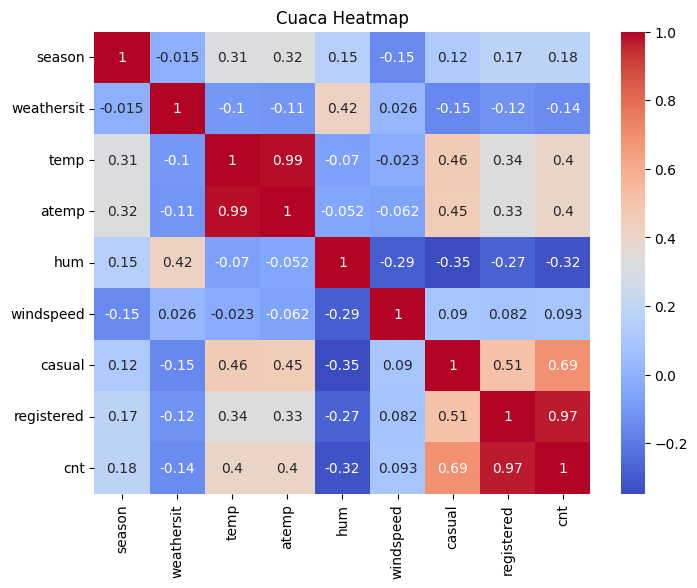

In [124]:
# Heatmap korelasi dataframe cuaca
caucamatrix = dfcuaca.corr()
#Save Correlation Heatmap
dfcuaca.to_csv('viz/cuaca_heatmap.csv', index=False)
plt.figure(figsize=(8, 6))
sns.heatmap(caucamatrix, annot=True, cmap='coolwarm')
plt.title('Cuaca Heatmap')
plt.show()

In [125]:
temp_scale.set_index('scale', inplace=True)

In [126]:
temp_scale = temp_scale.drop(['cnt'], axis=1)

In [127]:
#Save Grafik Cuaca
temp_scale.to_csv('viz/temp_scale.csv')

Text(0.5, 1.0, 'Temperature Level for Each Customer')

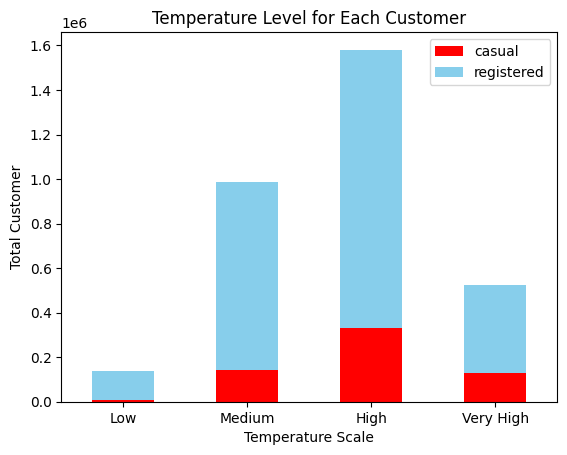

In [62]:
temp_scale.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
plt.xlabel('Temperature Scale')
plt.xticks(rotation=0)
plt.ylabel('Total Customer')
plt.title('Temperature Level for Each Customer')

In [63]:
mapseason = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
mapscale = {'Low': 'Low', 'Medium': 'Med', 'High': 'Hi', 'Very High': 'V. High'}
season_scale['season'] = season_scale['season'].map(mapseason)
season_scale['scale'] = season_scale['scale'].map(mapscale)

In [64]:
season_scale['season'] = season_scale['season'].astype('str')
season_scale['scale'] = season_scale['scale'].astype('str')
#season_scale['xseason'] = season_scale['season'] + ' ' + season_scale['scale']
print(season_scale.dtypes)

season        object
scale         object
casual         int64
registered     int64
total          int64
dtype: object


In [65]:
season_scale['xseason'] = season_scale['season'].astype(str) + '-' + season_scale['scale']
#Save season scale barchart
season_scale.to_csv('viz/season_scale.csv', index=False)

Text(0.5, 1.0, 'Temperature Level for Each Customer')

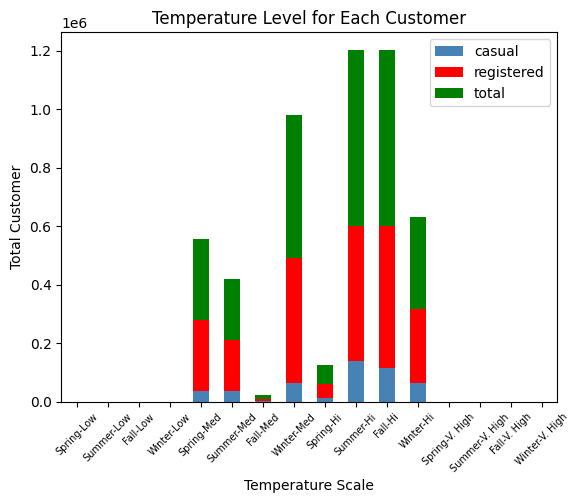

In [66]:
ax = season_scale.set_index('xseason').plot(kind='bar', stacked=True, color=['steelblue', 'red', 'green'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.xlabel('Temperature Scale')
plt.xticks(rotation=45)
plt.ylabel('Total Customer')
plt.title('Temperature Level for Each Customer')

- Pada satu hari secara maksimal, ada perbedaan yang sangat signifikan antara pengguna casual dan registered  
  yaitu pada nilai (1025 - casual) dan (4140 - registered)

In [67]:
dfdaily['dteday'] = pd.to_datetime(dfdaily['dteday'])
dfmonthly = dfdaily.copy()
dfmonthly['month'] = dfmonthly['dteday'].dt.month
dfmonthly['yr'] = dfmonthly['dteday'].dt.year

dfmonthly = dfmonthly.groupby(['month','yr']).agg({'casual':'sum','registered':'sum','cnt':'sum'}).reset_index()
df_lineplot = dfmonthly.sort_values(by=['yr', 'month']).reset_index(drop=True)
df_lineplot['month_yr'] = df_lineplot['month'].astype(str) + '-' + df_lineplot['yr'].astype(str)

In [68]:
#Lineplot by Month
df_lineplot.to_csv('viz/lineplot.csv', index=False)

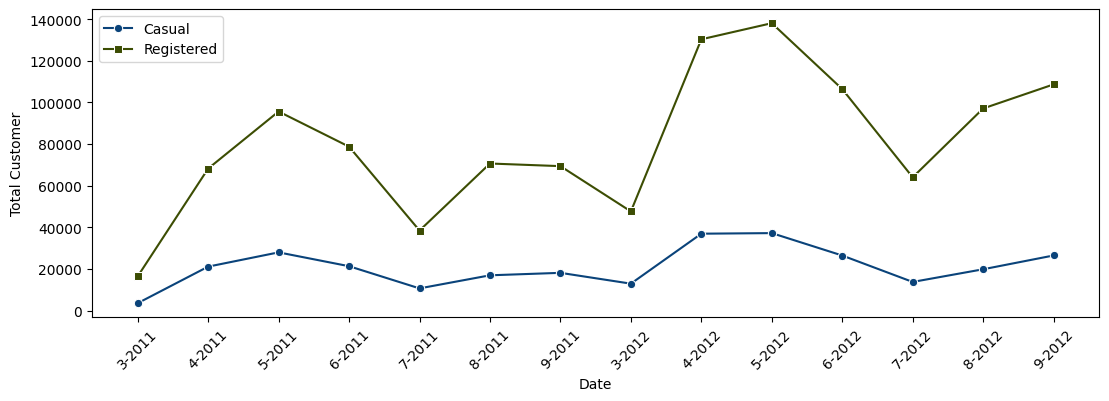

In [69]:
plt.figure(figsize=(13,4))
sns.lineplot(x='month_yr', y='casual', data=df_lineplot, marker='o', color='#0a437a', label='Casual')
sns.lineplot(x='month_yr', y='registered', data=df_lineplot, marker='s', color='#3c4d03', label='Registered')
plt.xlabel("Date") 
plt.xticks(rotation=45) 
plt.ylabel("Total Customer")
plt.legend(loc='upper left')
plt.show() 

### Pertanyaan 2: 

- Bandingkan pola kedua jenis user dan adakah strategi yang bisa direkomendasikan untuk meningkatkan user tersebut ?

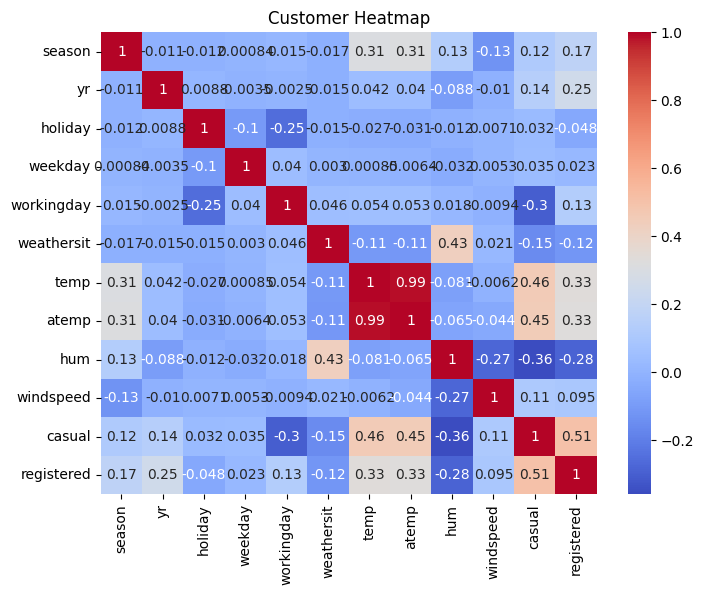

In [70]:
userc = usercorr.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(userc, annot=True, cmap='coolwarm')
plt.title('Customer Heatmap')
plt.show()

In [71]:
#Hour Time Lineplot of Casual User
hr_casual.to_csv('viz/lineplot_casual.csv', index=False)

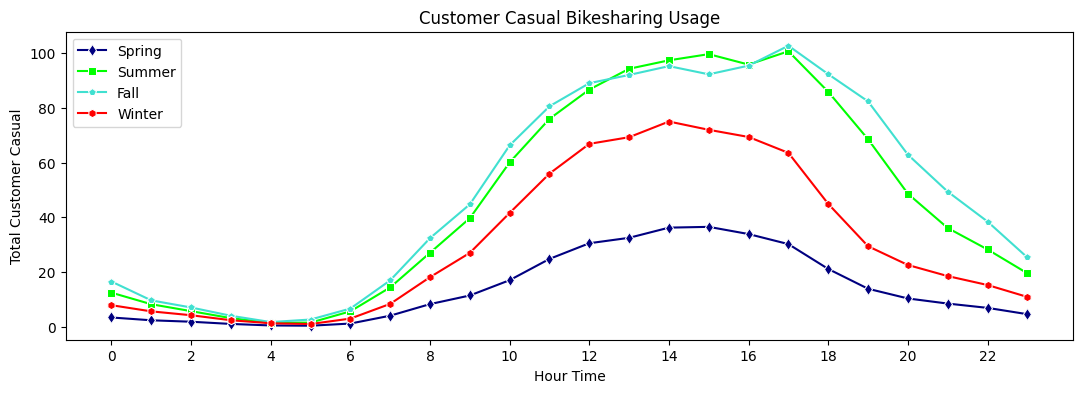

In [72]:
plt.figure(figsize=(13,4))
sns.lineplot(x='hr', y='casual_s1', data=hr_casual, marker='d', color='navy', label='Spring')
sns.lineplot(x='hr', y='casual_s2', data=hr_casual, marker='s', color='lime', label='Summer')
sns.lineplot(x='hr', y='casual_s3', data=hr_casual, marker='p', color='turquoise', label='Fall')
sns.lineplot(x='hr', y='casual_s4', data=hr_casual, marker='h', color='red', label='Winter')
plt.xlabel("Hour Time") 
plt.xticks(rotation=0)
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])
plt.ylabel("Total Customer Casual")
plt.title("Customer Casual Bikesharing Usage")
plt.legend(loc='upper left')
plt.show() 

In [73]:
#Hour Time Lineplot of Registered User
hr_regist.to_csv('viz/lineplot_regist.csv', index=False)

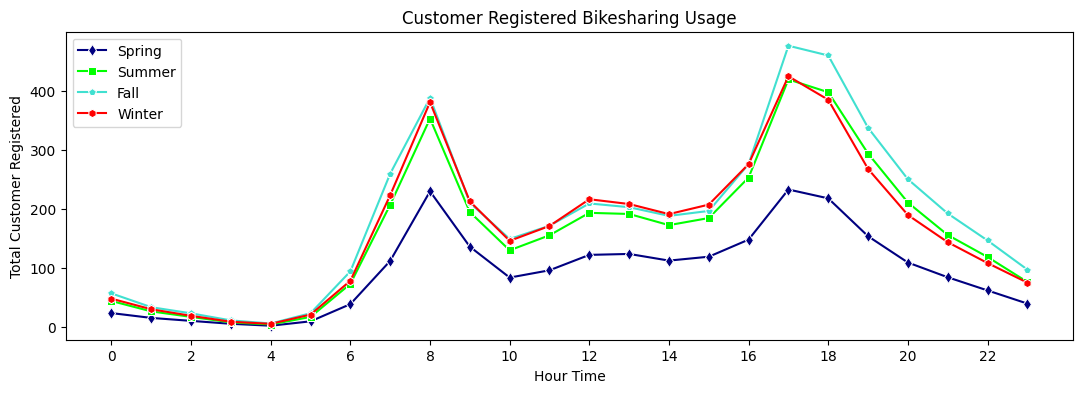

In [74]:
plt.figure(figsize=(13,4))
sns.lineplot(x='hr', y='registered_s1', data=hr_regist, marker='d', color='navy', label='Spring')
sns.lineplot(x='hr', y='registered_s2', data=hr_regist, marker='s', color='lime', label='Summer')
sns.lineplot(x='hr', y='registered_s3', data=hr_regist, marker='p', color='turquoise', label='Fall')
sns.lineplot(x='hr', y='registered_s4', data=hr_regist, marker='h', color='red', label='Winter')
plt.xlabel("Hour Time") 
plt.xticks(rotation=0)
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])
plt.ylabel("Total Customer Registered")
plt.title("Customer Registered Bikesharing Usage")
plt.legend(loc='upper left')
plt.show() 

## Conclusion

- 1. Jawaban : Para pengguna lebih cenderung tinggi pada saat suhu status suhu (Medium - High) atau pada nilai (0.25 - 0.75). Faktor musim tidak terlalu berpengaruh pada kedua jenis pengguna ini, sehingga untuk saat ini bisa kita hiraukan. Akan tetapi untuk eksplorasi lebih lanjut, kita masih membutuhkan faktor lainnya.
- Solusi : Untuk solusi faktor ini kita bisa memperbanyak persediaan sepeda khususnya pada akhir musim semi, panas dan musim gugur karena pada musim ini, suhu cenderung meningkat. Untuk musim dingin, kita mungkin bisa memasang fitur penghangat pada sepeda (jika ada).  
  
- 2. Jawaban : Kedua jenis pengguna ini memiliki pola yang cukup signifikan.  
     Pertama adalah jumlah, pada pengguna yang terdaftar (registered) jumlah pengguna ini sangatlah banyak dibanding pengguna biasa (casual) yang mana rata rata pengguna jika kita ambil dari faktor nomor 1 yaitu pengguna pada suhu (Medium - High) pengguna terdaftar ini kenaikan hingga 4x dibanding pengguna biasa.  
     Kedua adalah waktu penggunaan, pada pengguna terdaftar, ada waktu puncak dimana penggunaanya sangat tinggi yaitu pukul 8 pagi dan 5 sore, sedangkan pada pengguna biasa, penggunaanya berkelanjutan naik dari jam 6 pagi hingga puncaknya jam 6 sore, disini bisa kita ketahui bahwa pada puncak oleh pengguna terdaftar ada kemungkinan itu adalah mayoritas jam kerja, berbeda pula dengan pengguna biasa dimana penggunaannya selalu meningkat selama jam kerja.